In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set visualization style
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Drop CustomerID as it's not a feature
df = df.drop('CustomerID', axis=1)

# Rename columns for simplicity
df.columns = ['Gender', 'Age', 'AnnualIncome', 'SpendingScore']

# Display basic information
print('Dataset Info:')
print(df.info())
print('\nMissing Values:')
print(df.isnull().sum())

# Encode Gender (Male=1, Female=0)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Standardize numerical features
scaler = StandardScaler()
feature_cols = ['Age', 'AnnualIncome', 'SpendingScore']
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Save cleaned dataset
df.to_csv('Mall_Customers_Cleaned.csv', index=False)
print('\nCleaned Dataset Info:')
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         200 non-null    object
 1   Age            200 non-null    int64 
 2   AnnualIncome   200 non-null    int64 
 3   SpendingScore  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
None

Missing Values:
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         200 non-null    int64  
 1   Age            200 non-null    float64
 2   AnnualIncome   200 non-null    float64
 3   SpendingScore  200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB
None


Summary Statistics:
           Gender           Age  AnnualIncome  SpendingScore
count  200.000000  2.000000e+02  2.000000e+02   2.000000e+02
mean     0.440000 -1.021405e-16 -2.131628e-16  -1.465494e-16
std      0.497633  1.002509e+00  1.002509e+00   1.002509e+00
min      0.000000 -1.496335e+00 -1.738999e+00  -1.910021e+00
25%      0.000000 -7.248436e-01 -7.275093e-01  -5.997931e-01
50%      0.000000 -2.045351e-01  3.587926e-02  -7.764312e-03
75%      1.000000  7.284319e-01  6.656748e-01   8.851316e-01
max      1.000000  2.235532e+00  2.917671e+00   1.894492e+00


<Figure size 1000x800 with 0 Axes>

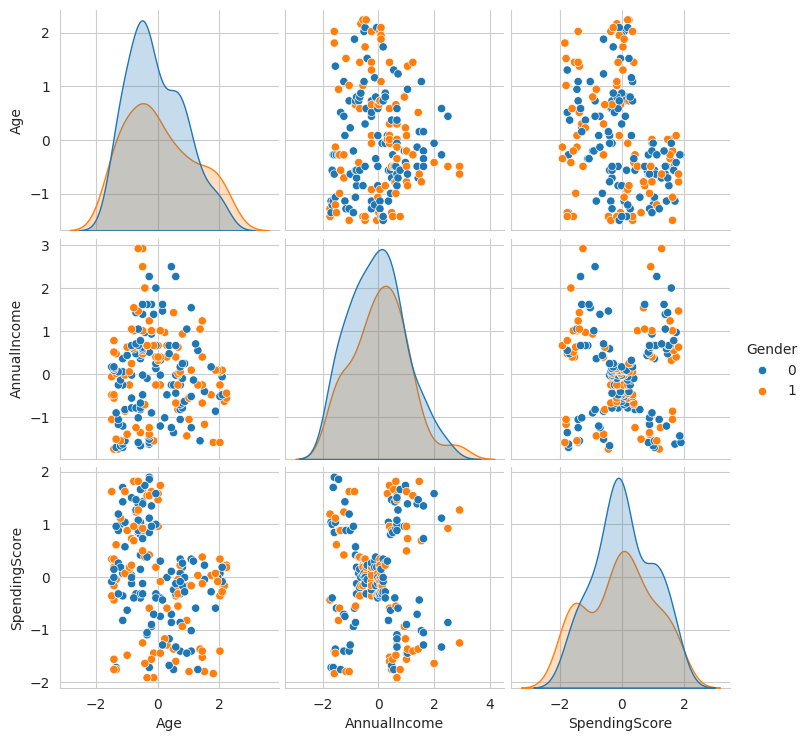

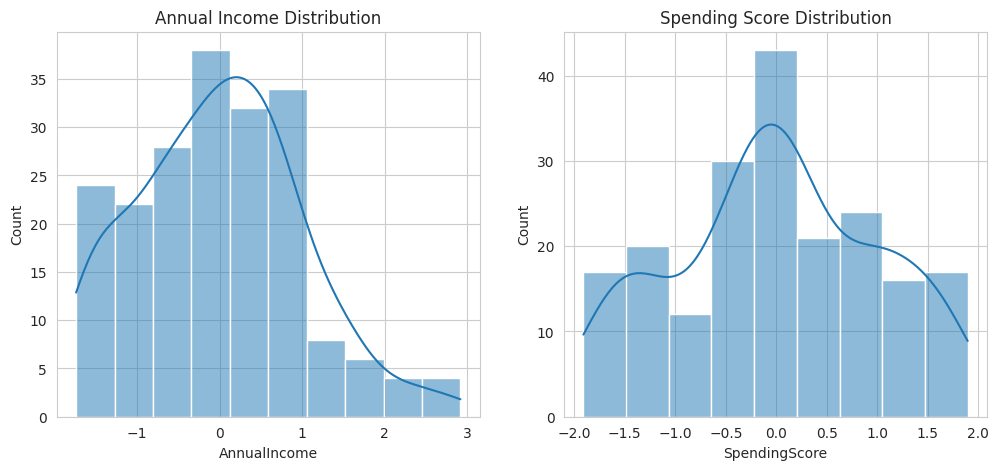

In [3]:
# Summary statistics
print('Summary Statistics:')
print(df.describe())

# Pairplot for features
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Gender', 'Age', 'AnnualIncome', 'SpendingScore']], hue='Gender')
plt.savefig('pairplot.png')
plt.show()

# Distribution of Annual Income and Spending Score
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['AnnualIncome'], kde=True)
plt.title('Annual Income Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['SpendingScore'], kde=True)
plt.title('Spending Score Distribution')
plt.savefig('distributions.png')
plt.show()

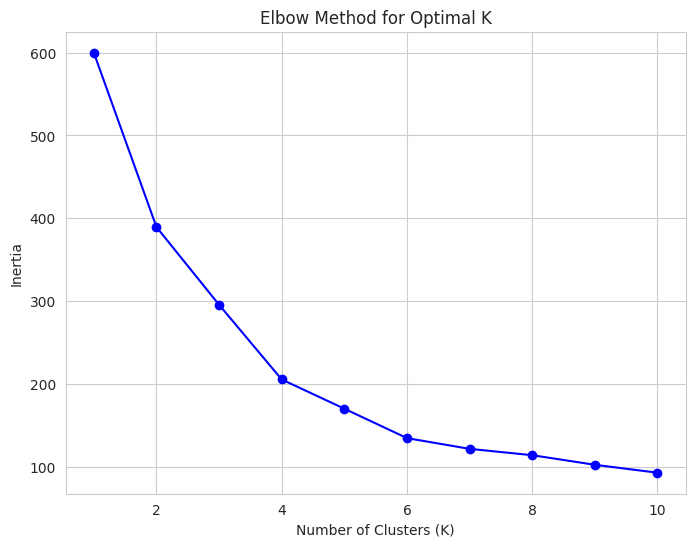

Silhouette Score for K=5: 0.4085


In [4]:
# Prepare data (exclude Gender for clustering, as it's categorical)
X = df[['Age', 'AnnualIncome', 'SpendingScore']]

# Elbow Method to find optimal K
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig('elbow_curve.png')
plt.show()

# Choose optimal K (based on elbow curve, typically where the curve bends)
optimal_k = 5  # Adjust based on visual inspection of elbow curve

# Fit K-Means with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Calculate Silhouette Score
sil_score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score for K={optimal_k}: {sil_score:.4f}')

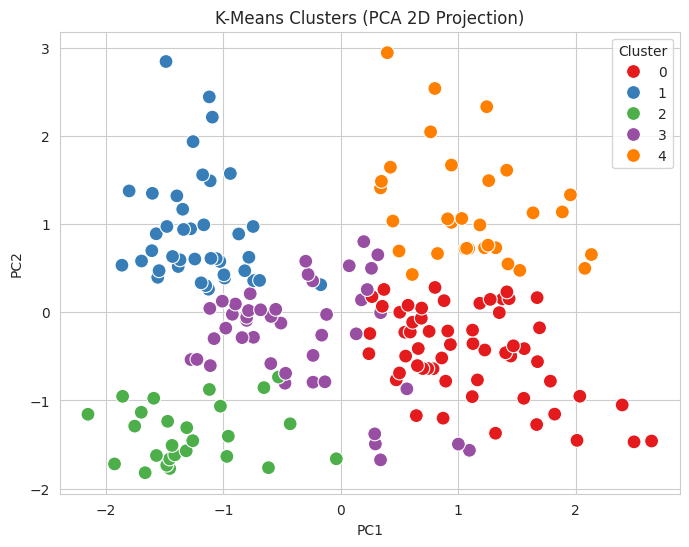

Explained Variance Ratio by PCA: [0.44266167 0.33308378]


In [5]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df['Cluster']

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=df_pca, s=100)
plt.title('K-Means Clusters (PCA 2D Projection)')
plt.savefig('cluster_visualization.png')
plt.show()

# Explained variance by PCA components
print(f'Explained Variance Ratio by PCA: {pca.explained_variance_ratio_}')